In [ ]:
# SDH DATA ACCESS WITH PYTHON - DEMO

In [1]:
import sys
import pandas as pd
import csv
import logging
import sklearn
import numpy
import scipy
import matplotlib
import boto3
import ckanapi
import seaborn as sns
from sdhpy.pandas import SdhPandas


In [71]:
# RUN ONLY WHEN YOU REALLY WANT TO SEE EVERYTHING!! (EATS SPACE)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 4000)


In [2]:
sdh = SdhPandas(store_apikey="b23df72e-2150-446f-8207-2c8f0af6e39b")



In [3]:
# sdh_postal_code_profile_as_pandas_df
profile_df = sdh.url("https://store.smartdatahub.io/dataset/fi_sdh_postalcode_profile_finland/resource/73772aa9-72f9-4dbb-8217-3e19ecf8248e").data

In [6]:
male_female_comparison_df = profile_df[[
 'postalcode',
 'name',
 'municipality_number',
 'inhabitants_total',
 'inhabitants_female',
 'inhabitants_male',
 'inhabitants_avg_age',
 'inhabitants_age_0_2',
 'inhabitants_age_3_6',
 'inhabitants_age_7_12',
 'inhabitants_age_13_15',
 'inhabitants_age_16_17',
 'inhabitants_age_18_19',
 'inhabitants_age_20_24',
 'inhabitants_age_25_29',
 'inhabitants_age_30_34',
 'inhabitants_age_35_39',
 'inhabitants_age_40_44',
 'inhabitants_age_45_49',
 'inhabitants_age_50_54',
 'inhabitants_age_55_59',
 'inhabitants_age_60_64',
 'inhabitants_age_65_69',
 'inhabitants_age_70_74',
 'inhabitants_age_75_79',
 'inhabitants_age_80_84',
 'inhabitants_age_85',
 'inhabitants_population_density',
 'inhabitants_proportional_female',
 'inhabitants_proportional_male',
 'inhabitants_proportional_age_0_2',
 'inhabitants_proportional_age_3_6',
 'inhabitants_proportional_age_7_12',
 'inhabitants_proportional_age_13_15',
 'inhabitants_proportional_age_16_17',
 'inhabitants_proportional_age_18_19',
 'inhabitants_proportional_age_20_24',
 'inhabitants_proportional_age_25_29',
 'inhabitants_proportional_age_30_34',
 'inhabitants_proportional_age_35_39',
 'inhabitants_proportional_age_40_44',
 'inhabitants_proportional_age_45_49',
 'inhabitants_proportional_age_50_54',
 'inhabitants_proportional_age_55_59',
 'inhabitants_proportional_age_60_64',
 'inhabitants_proportional_age_65_69',
 'inhabitants_proportional_age_70_74',
 'inhabitants_proportional_age_75_79',
 'inhabitants_proportional_age_80_84',
 'inhabitants_proportional_age_85',
 'income_average',
 'income_median',
 'income_class_low',
 'income_class_medium',
 'income_class_high',
 'income_class_proportional_low',
 'income_class_proportional_medium',
 'income_class_proportional_high',
 'households_total',
 'households_avg_size',
 'households_occupancy_rate',
 'households_young_single',
 'households_young_couples',
 'households_children',
 'households_children_under_3',
 'households_children_under_7',
 'households_children_school',
 'households_children_teen',
 'households_adult',
 'households_pensioner',
 'households_dwelling_own',
 'households_dwelling_rental',
 'households_dwelling_other',
 'households_proportional_young_single',
 'households_proportional_young_couples',
 'households_proportional_children',
 'households_proportional_children_under_3',
 'households_proportional_children_under_7',
 'households_proportional_children_school',
 'households_proportional_children_teen',
 'households_proportional_adult',
 'households_proportional_pensioner',
 'households_proportional_dwelling_own',
 'households_proportional_dwelling_rental',
 'households_proportional_dwelling_other',
 'households_income_avg',
 'households_income_median',
 'households_income_class_low',
 'households_income_class_med',
 'households_income_class_hi',
 'households_income_class_proportional_low',
 'households_income_class_proportional_med',
 'households_income_class_proportional_hi',
 'households_income_accumulated',
 'buildings_freetime',
 'buildings_total',
 'buildings_other',
 'buildings_residential',
 'buildings_proportional_other',
 'buildings_proportional_residential'
]]

In [8]:
male_female_comparison_df.to_csv("C:\\Users\\andro\\repositories\\dscipy_warmups\\fingerwarmup\\male_female_comparison_df.csv")

In [ ]:
df_children_7_12_schools = profile_df[['inhabitants_age_7_12','inhabitants_proportional_age_7_12','schools_basic_upper_secondary']].copy()

In [ ]:
df_children_7_12_schools.corr(method='kendall')

In [18]:
# Calculates kendall correlations for whole variableset. Heavy, but insightful
profile_df.corr(method='kendall')

,postalcode,municipality_number,area_sqm,shape_lenght,area_sqm_sea,...,sports_facilities_water,sports_facilities_crosscountry,sports_facilities_boating_aviation_motorsports,sports_facilities_animal,sports_facilities_maintenance
postalcode,1.000000,0.146985,0.303765,0.245669,0.280426,...,NaN,0.026769,NaN,NaN,NaN
municipality_number,0.146985,1.000000,0.104525,0.094922,0.097927,...,NaN,-0.059124,NaN,NaN,NaN
area_sqm,0.303765,0.104525,1.000000,0.811269,0.915868,...,NaN,0.125809,NaN,NaN,NaN
shape_lenght,0.245669,0.094922,0.811269,1.000000,0.852852,...,NaN,0.130839,NaN,NaN,NaN
area_sqm_sea,0.280426,0.097927,0.915868,0.852852,1.000000,...,NaN,0.114687,NaN,NaN,NaN
shape_lenght_sea,0.257098,0.091628,0.812030,0.956074,0.878937,...,NaN,0.132089,NaN,NaN,NaN
inhabitants_total,-0.242905,-0.075641,-0.105107,-0.053082,-0.098016,...,NaN,0.289320,NaN,NaN,NaN
inhabitants_female,-0.241395,-0.077435,-0.130429,-0.076797,-0.122675,...,NaN,0.284469,NaN,NaN,NaN
inhabitants_male,-0.232978,-0.076842,-0.116118,-0.063873,-0.108837,...,NaN,0.287976,NaN,NaN,NaN
inhabitants_avg_age,0.191943,0.074843,0.311938,0.291169,0.311493,...,NaN,-0.044263,NaN,NaN,NaN


In [ ]:
correlation_kendall_to_file = profile_df.corr(method='kendall')

In [ ]:
print(type(correlation_kendall_to_file))

In [ ]:
correlation_kendall_to_file.to_csv("C:\\Users\\andro\\repositories\\dscipy_warmups\\fingerwarmup\\kendall_correlations_to_file.csv")

In [110]:
# OK, then regression - trying first to do it with Pandas.
target = pd.DataFrame(profile_df, columns=["income_median"])
# this would be really nice, but throws an data incompatibility error (there are some nulls in data)
#..which stats module would be robust enough to just ignore pairs, where an observation is missing?

In [123]:
# ...this column is fully populated, unlike median_income
target = pd.DataFrame(profile_df, columns=['inhabitants_population_density'])

In [10]:
type(target)

pandas.core.frame.DataFrame

In [117]:
list(target)

['area_sqm']

In [121]:
predictors = pd.DataFrame(profile_df, columns=[
  'postalcode'
 ,'inhabitants_total'
 ,'area_sqm'
]
)

In [103]:
# this one has only one var - testing
predictors = pd.DataFrame(profile_df, columns=[
 'postalcode'
]
)

In [124]:
list(target)

['inhabitants_population_density']

In [126]:
list(predictors)

['postalcode', 'inhabitants_total', 'area_sqm']

In [55]:
import statsmodels.api as sm


In [127]:
X = predictors[['postalcode','inhabitants_total','area_sqm']]
y = target['inhabitants_population_density']

In [118]:
X = predictors['postalcode']
y = target['area_sqm']

In [128]:
model = sm.OLS(y,X).fit()
predictions = model.predict(X)

In [129]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     inhabitants_population_density   R-squared:                       0.359
Model:                                        OLS   Adj. R-squared:                  0.359
Method:                             Least Squares   F-statistic:                     568.3
Date:                            Thu, 31 Jan 2019   Prob (F-statistic):          3.38e-293
Time:                                    22:06:27   Log-Likelihood:                -24903.
No. Observations:                            3043   AIC:                         4.981e+04
Df Residuals:                                3040   BIC:                         4.983e+04
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
postalcode           -0.0011      0.000     -3.279      0.001      -0.002      -0.000
inhabitants_total     0.1966      0.005     40.648      0.000       0.187       0.206
area_sqm          -4.217e-07   8.13e-08     -5.186      0.000   -5.81e-07   -2.62e-07
==============================================================================
Omnibus:                     4352.043   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2265180.401
Skew:                           8.168   Prob(JB):                         0.00
Kurtosis:                     135.659   Cond. No.                     7.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
sns.set(style="ticks")

In [23]:
x = (profile_df["inhabitants_avg_age"])
y = (profile_df["income_median"])

C:\Users\andro\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


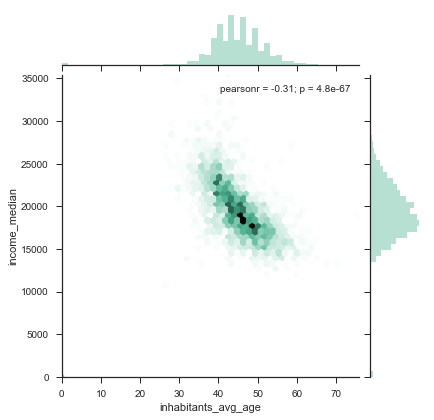

In [24]:
sns.jointplot(x, y, kind="hex", color="#4CB391")

In [87]:
# THIS IS ONLY FOR THE SAKE OF EXAMPLE, NOT A GUIDE
profile_df["income_median"].fillna(0, inplace=True)


In [98]:
predictors_short = pd.DataFrame(profile_df, columns=[
'postalcode'
,'inhabitants_population_density'
,'households_total']
)

In [99]:
predictors_short

,postalcode,inhabitants_population_density,households_total
0,120,17040.650000,3883
1,140,8514.328000,4427
2,180,7811.361000,7503
3,240,2174.621800,2714
4,260,7277.153000,3115
5,270,8911.432000,4460
6,290,613.978640,102
7,310,1323.771700,542
8,320,5236.114300,6271
9,330,4962.703000,4624


In [100]:
X = predictors_short[[
 'postalcode'
,'inhabitants_population_density'
,'households_total']]
y = target['income_median']

In [101]:
model = sm.OLS(y,X).fit()
predictions = model.predict(X)

In [102]:
model.summary()

C:\Users\andro\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\andro\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\andro\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\andro\Anaconda3\lib\site-packages\scipy\stats\stats.py:1429: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          income_median   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 31 Jan 2019   Prob (F-statistic):                nan
Time:                        21:07:49   Log-Likelihood:                    nan
No. Observations:                3043   AIC:                               nan
Df Residuals:                    3040   BIC:                               nan
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
postalcode                            nan        nan        nan        nan         nan         nan
inhabitants_population_density        nan        nan        nan        nan         nan         nan
households_total                      nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         78.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""